## Learning Objectives

At the end of the experiment, you will be able to

* know categorical variables and its types
* understand the significance of encoding categorical variables
* understand and implement different process to encode categorical variable using a real life dataset
* understand and handle miscellaneous categorical variable

### Introduction




All Machine Learning models are some kind of mathematical model that needs numbers to work with. Categorical data have possible values (categories) and it can be in text form. For example, Gender: Male/Female/Others, Ranks: 1st/2nd/3rd, etc.

While working on a data science project after handling the missing value of datasets. The next work is to handle categorical data in datasets before applying any ML models.

First, let’s understand the types of categorical data:
1. **Nominal Data:** The nominal data called labelled/named data. Allowed to change the order of categories, change in order doesn’t affect its value. For example, Gender (Male/Female/Other), Age Groups (Young/Adult/Old), etc.
2. **Ordinal Data:** Represent discretely and ordered units. Same as nominal data but have ordered/rank. Not allowed to change the order of categories. For example, Ranks: 1st/2nd/3rd, Education: (High School/Undergrads/Postgrads/Doctorate), etc.

Regardless of what the value is used for, the challenge is determining how to use this (categorical) data in the analysis because of the following constraints:

* Categorical features may have a very large number of levels, known as high cardinality, (for example, cities or URLs), where most of the levels appear in a relatively small number of instances.
* Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.
* While some ML packages or libraries might transform categorical data to numeric automatically based on some default embedding method, many other ML packages don’t support such inputs.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### General Exploration steps for Categorical Data

In this notebook, we'll focus on dealing with categorical features in the nycflights13 dataset. This dataset is a collection of data pertaining to different airlines flying from different
airports in NYC, also capturing flight, plane and weather specific details during the year of 2013.
This dataset contains information about on-time departure of all flights from NYC (i.e. JFK, LGA or EWR airports) in 2013.



In [2]:
#@title Download the data
!wget https://cdn.iisc.talentsprint.com/CDS/Datasets/flight_data.csv

--2023-04-18 10:25:26--  https://cdn.iisc.talentsprint.com/CDS/Datasets/flight_data.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29806282 (28M) [application/octet-stream]
Saving to: ‘flight_data.csv’

flight_data.csv     100%[===================>]  28.42M  5.89MB/s    in 4.8s    

2023-04-18 10:25:32 (5.89 MB/s) - ‘flight_data.csv’ saved [29806282/29806282]



In [3]:
# read the data
nyc_flights = pd.read_csv('flight_data.csv')

In [4]:
# first five rows of the dataset
nyc_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


The next step is to gather some information about different column in our DataFrame. We can do so by using `.info()`, which basically gives the information about the number of rows, columns, column data types, memory usage, etc.

In [5]:
# information of the dataset
nyc_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

#### Box Plot

Now, to analyze the relationship between a categorical feature and a continuous feature, we create a boxplot. The boxplot is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines at either side of the rectangle.

We can plot a boxplot by utilizing `.boxplot()` on our DataFrame. Here, we will plot a boxplot of the `dep_time` column with respect to the three `origin` of the flights from JFK, LGA and EWR.

<Axes: title={'center': 'dep_time'}, xlabel='origin'>

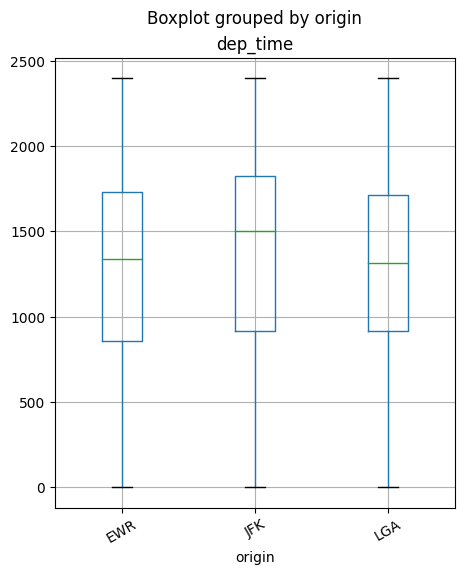

In [6]:
nyc_flights.boxplot('dep_time', 'origin', rot=30, figsize=(5,6))

As we will only be dealing with categorical features in this tutorial, it's better to filter them out and after that we will check the data for null values. The method `.copy()` is used here so that any changes made in new DataFrame does not get reflected in the original one.

In [7]:
# filtering the categorical data (data type = 'object')
cat_nyc_flights = nyc_flights.select_dtypes(include=['object']).copy()

In [8]:
cat_nyc_flights.head()

,carrier,tailnum,origin,dest,time_hour
0,UA,N14228,EWR,IAH,1/1/2013 5:00
1,UA,N24211,LGA,IAH,1/1/2013 5:00
2,AA,N619AA,JFK,MIA,1/1/2013 5:00
3,B6,N804JB,JFK,BQN,1/1/2013 5:00
4,DL,N668DN,LGA,ATL,1/1/2013 6:00


In [9]:
# total null values
cat_nyc_flights.isnull().values.sum()

2512

In [10]:
# checking null values in each feature
cat_nyc_flights.isnull().sum()

carrier         0
tailnum      2512
origin          0
dest            0
time_hour       0
dtype: int64

It seems that only the tailnum column has null values. We can do a mode imputation for those null values. The `.fillna()` method is handy for such operations.

In [11]:
cat_nyc_flights = cat_nyc_flights.fillna(cat_nyc_flights['tailnum'].value_counts().index[0])

Using the above method, `.fillna()` will fill the null instances with the mode value.

In [12]:
# checking for null values after imputation
cat_nyc_flights.isnull().sum()

carrier      0
tailnum      0
origin       0
dest         0
time_hour    0
dtype: int64

Another Exploratory Data Analysis (EDA) step that we might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the `.value_counts()` method as described earlier.

In [13]:
# value counts of carrier 
cat_nyc_flights['carrier'].value_counts()

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

In [14]:
# different carrier counts
cat_nyc_flights['carrier'].value_counts().count()

16

This means there are 16 different carriers. Now, we will plot the frequency distribution plot to visualize the carriers.

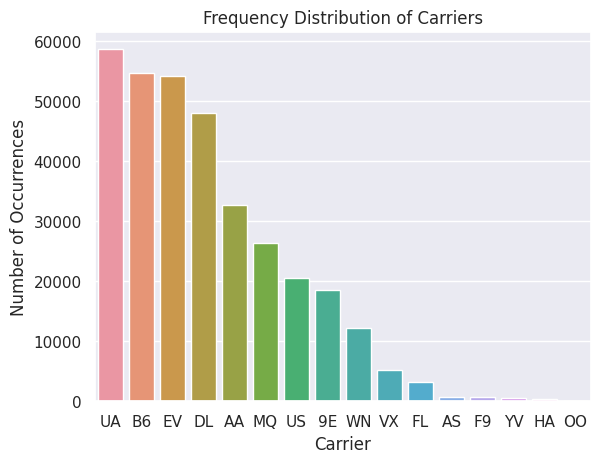

In [15]:
carrier_count = cat_nyc_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=carrier_count.index, y=carrier_count.values)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

In the next section, we will see different methods to encode the categorical variable so that they can be used in machine learning models.

### Encoding Categorical Data

To keep it simple, we will apply these encoding methods only on the `carrier` column. However, the same approach can be extended to all other features.

The different methods we will be covering here are as follows:

* Replacing values
* Encoding labels
* One-Hot encoding
* Binary encoding
* Backward difference encoding
* Miscellaneous features

#### Replacing Values

Let's start with the most basic method, which is just replacing the categories with the desired numbers. This can be achieved with the help of the replace() function in pandas. 


In [16]:
map_dict = {'carrier':{'UA': 1, 'B6': 2, 'EV': 3, 'DL': 4, 'AA': 5, 'MQ': 6, 'US': 7, '9E': 8, 'WN': 10, 
                       'VX': 11, 'FL': 12, 'AS': 13, 'F9': 14, 'YV': 15, 'OO':16}}
map_dict

{'carrier': {'UA': 1,
  'B6': 2,
  'EV': 3,
  'DL': 4,
  'AA': 5,
  'MQ': 6,
  'US': 7,
  '9E': 8,
  'WN': 10,
  'VX': 11,
  'FL': 12,
  'AS': 13,
  'F9': 14,
  'YV': 15,
  'OO': 16}}

In [17]:
labels = cat_nyc_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_dict = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_dict)

{'carrier': {'9E': 1, 'AA': 2, 'AS': 3, 'B6': 4, 'DL': 5, 'EV': 6, 'F9': 7, 'FL': 8, 'HA': 9, 'MQ': 10, 'OO': 11, 'UA': 12, 'US': 13, 'VX': 14, 'WN': 15, 'YV': 16}}


Above, the numbering is replaced alphabatically.

In [18]:
# make a copy of data
cat_nyc_flights_replace = cat_nyc_flights.copy()

Use the `.replace()` function on the DataFrame by passing the mapping dictionary as argument:

In [19]:
cat_nyc_flights_replace.replace(replace_map_dict, inplace=True)

cat_nyc_flights_replace.head()

,carrier,tailnum,origin,dest,time_hour
0,12,N14228,EWR,IAH,1/1/2013 5:00
1,12,N24211,LGA,IAH,1/1/2013 5:00
2,2,N619AA,JFK,MIA,1/1/2013 5:00
3,4,N804JB,JFK,BQN,1/1/2013 5:00
4,5,N668DN,LGA,ATL,1/1/2013 6:00


As we can observe, we have encoded the categories with the mapped numbers in your DataFrame.

In [20]:
# checking the data type
cat_nyc_flights_replace['carrier'].dtype

dtype('int64')

In python, it is a good practice that we change the data type of categorical features to category. This can be done using `.astype` as shown.

In [21]:
cat_nyc_flights_c = cat_nyc_flights.copy()       # making a copy of the dataset
cat_nyc_flights_c['carrier'] = cat_nyc_flights_c['carrier'].astype('category')
cat_nyc_flights_c['origin'] = cat_nyc_flights_c['origin'].astype('category')                                                              
cat_nyc_flights_c.dtypes

carrier      category
tailnum        object
origin       category
dest           object
time_hour      object
dtype: object

#### Label Encoding

Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

We can do label encoding via attributes .cat.codes on your DataFrame's column.



In [22]:
# label encoding using cat.codes
cat_nyc_flights_c['carrier'] = cat_nyc_flights_c['carrier'].cat.codes

In [23]:
cat_nyc_flights_c.head()     #alphabetically labeled from 0 to 10


,carrier,tailnum,origin,dest,time_hour
0,11,N14228,EWR,IAH,1/1/2013 5:00
1,11,N24211,LGA,IAH,1/1/2013 5:00
2,1,N619AA,JFK,MIA,1/1/2013 5:00
3,3,N804JB,JFK,BQN,1/1/2013 5:00
4,4,N668DN,LGA,ATL,1/1/2013 6:00


Suppose we want only a particular category to some value and other category to some other values. This can be done by `numpy` `.where()` method. Here, we will encode all the UA carrier flights to value 1 and other carriers to value 0. 

In [24]:
cat_nyc_flights_specific = cat_nyc_flights.copy()
cat_nyc_flights_specific['UA_encode'] = np.where(cat_nyc_flights_specific['carrier'].str.contains('UA'), 1, 0)

cat_nyc_flights_specific.head()

,carrier,tailnum,origin,dest,time_hour,UA_encode
0,UA,N14228,EWR,IAH,1/1/2013 5:00,1
1,UA,N24211,LGA,IAH,1/1/2013 5:00,1
2,AA,N619AA,JFK,MIA,1/1/2013 5:00,0
3,B6,N804JB,JFK,BQN,1/1/2013 5:00,0
4,DL,N668DN,LGA,ATL,1/1/2013 6:00,0


We can also use scikit-learn's **LabelEncoder**.

In [25]:
from sklearn.preprocessing import LabelEncoder

cat_nyc_flights_LE = cat_nyc_flights.copy()      #copying the original data

le = LabelEncoder()
cat_nyc_flights_LE['carrier_label_code'] = le.fit_transform(cat_nyc_flights['carrier'])

cat_nyc_flights_LE.head()                        #Results in appending a new column to df

,carrier,tailnum,origin,dest,time_hour,carrier_label_code
0,UA,N14228,EWR,IAH,1/1/2013 5:00,11
1,UA,N24211,LGA,IAH,1/1/2013 5:00,11
2,AA,N619AA,JFK,MIA,1/1/2013 5:00,1
3,B6,N804JB,JFK,BQN,1/1/2013 5:00,3
4,DL,N668DN,LGA,ATL,1/1/2013 6:00,4


Label encoding is pretty much intuitive and straight-forward and may give a good performance from our learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm. Should the carrier UA (encoded to 11) be given 11x more weight than the carrier AA (encoded to 1) ?

To solve this issue there is another popular way to encode the categories via something called one-hot encoding.

#### One Hot Encoding

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

There are many libraries out there that support one-hot encoding but the simplest one is using pandas' `.get_dummies()` method.

This function is named this way because it creates dummy/indicator variables (1 or 0). There are mainly three arguments important here, the first one is the DataFrame we want to encode on

In [26]:
cat_nyc_flights_onehot = cat_nyc_flights.copy()
cat_nyc_flights_onehot = pd.get_dummies(cat_nyc_flights_onehot, columns=['carrier'], prefix = ['carrier'])

cat_nyc_flights_onehot.head()

,tailnum,origin,dest,time_hour,carrier_9E,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_EV,carrier_F9,carrier_FL,carrier_HA,carrier_MQ,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_YV
0,N14228,EWR,IAH,1/1/2013 5:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,N24211,LGA,IAH,1/1/2013 5:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,N619AA,JFK,MIA,1/1/2013 5:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N804JB,JFK,BQN,1/1/2013 5:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,N668DN,LGA,ATL,1/1/2013 6:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


As we can see, the column carrier_US gets value 1 at the 0th and 1st observation points as those points had the UA category labeled in the original DataFrame. Likewise for other columns also.

scikit-learn also supports one hot encoding via **LabelBinarizer** and OneHotEncoder in its preprocessing module. Just for the sake of practicing, will do the same encoding via LabelBinarizer:

In [27]:
from sklearn.preprocessing import LabelBinarizer
cat_nyc_flights_onehot_sklearn = cat_nyc_flights.copy()

lb = LabelBinarizer()
lb_code = lb.fit_transform(cat_nyc_flights_onehot_sklearn['carrier'])
lb_code_nyc = pd.DataFrame(lb_code, columns=lb.classes_)

lb_code_nyc.head()

,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Now, this resulted in a new DataFrame with only the one hot encodings for the feature `carrier` and it needs to be added to the dataframe using `.concat()` method in pandas.

In [28]:
# adding one hot encoding columns with the dataset
result_df = pd.concat([cat_nyc_flights_onehot_sklearn, lb_code_nyc], axis=1)

result_df.head()

,carrier,tailnum,origin,dest,time_hour,9E,AA,AS,B6,DL,...,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
0,UA,N14228,EWR,IAH,1/1/2013 5:00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,UA,N24211,LGA,IAH,1/1/2013 5:00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,AA,N619AA,JFK,MIA,1/1/2013 5:00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B6,N804JB,JFK,BQN,1/1/2013 5:00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,DL,N668DN,LGA,ATL,1/1/2013 6:00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

#### Binary Encoding

This technique is not as intuitive as the previous ones. In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions than one-hot. We can do binary encoding via a number of ways but the simplest one is using the category_encoders library.

In [29]:
!pip install -qq category_encoders               # installing category_encoders library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.3 MB/s eta 0:00:00


In [30]:
# importing category_encoders library for labelbinarizer 
import category_encoders as ce
cat_nyc_flights_ce = cat_nyc_flights.copy()

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_nyc_flights_ce)

df_binary.head(10)

,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest,time_hour
0,0,0,0,0,1,N14228,EWR,IAH,1/1/2013 5:00
1,0,0,0,0,1,N24211,LGA,IAH,1/1/2013 5:00
2,0,0,0,1,0,N619AA,JFK,MIA,1/1/2013 5:00
3,0,0,0,1,1,N804JB,JFK,BQN,1/1/2013 5:00
4,0,0,1,0,0,N668DN,LGA,ATL,1/1/2013 6:00
5,0,0,0,0,1,N39463,EWR,ORD,1/1/2013 5:00
6,0,0,0,1,1,N516JB,EWR,FLL,1/1/2013 6:00
7,0,0,1,0,1,N829AS,LGA,IAD,1/1/2013 6:00
8,0,0,0,1,1,N593JB,JFK,MCO,1/1/2013 6:00
9,0,0,0,1,0,N3ALAA,LGA,ORD,1/1/2013 6:00


**Note:** Notice that four new columns are created in place of the carrier column with binary encoding for each category in the feature.

#### Backward Difference Encoding

This technique falls under the contrast coding system for categorical features. A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables. In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a nominal or an ordinal variable.

This can also be implemented using `category_encoders` library, just this time we will call `BackwardDifferenceEncoder` from it. 

In [31]:
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])
df_bd = encoder.fit_transform(cat_nyc_flights_ce)

df_bd.head()

/usr/local/lib/python3.9/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.9/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,carrier_10,carrier_11,carrier_12,carrier_13,carrier_14,tailnum,origin,dest,time_hour
0,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,N14228,EWR,IAH,1/1/2013 5:00
1,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,N24211,LGA,IAH,1/1/2013 5:00
2,1,0.0625,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,N619AA,JFK,MIA,1/1/2013 5:00
3,1,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,N804JB,JFK,BQN,1/1/2013 5:00
4,1,0.0625,0.125,0.1875,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,N668DN,LGA,ATL,1/1/2013 6:00


The interesting thing here is that you can see that the results are not the standard 1’s and 0’s you saw in the dummy encoding examples but rather regressed continuous values.

**Note:** "intercept", is simply a series of 1s and will have no impact on our modelling. In backward difference encoding table, perhaps it could be viewed as comparing the uppermost level with the next level up. Given that every value in the column belongs to the uppermost level or below, all values for the encoded column in this comparison will be 1 (and the other values, if they existed, would be 0).



#### Miscellaneous Features

Sometimes we may encounter categorical feature columns which specify the ranges of values for observation points, for example, the age column might be described in the form of categories like 0-20, 20-40 and so on.

While there can be a lot of ways to deal with such features, the most common ones are either split these ranges into two separate columns or replace them with some measure like the mean of that range.

First, we will create a dummy DataFrame which has just one feature age with ranges specified using the pandas DataFrame function.

In [32]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

Then we will split the column on the delimeter - into two columns start and end using `split()` with a `lambda()` function.

In [33]:
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

dummy_df_age.head()

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


To replace the range with its mean, we will write a `split_mean()` function which basically takes one range at a time, splits it, then calculates the mean and returns it. To apply a certain function to all the entities of a column you will use the `.apply()` method:

In [34]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['mean_age'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

dummy_df_age.head()

,age,start,end,mean_age
0,0-20,0,20,10.0
1,20-40,20,40,30.0
2,40-60,40,60,50.0
3,60-80,60,80,70.0
